# Exploratory Data Analysis of My Spotify Tracks Audio Features

Let's pick up where we left off in the last notebook. First, we'll load the dataframe and inspect it to ensure the data is ready for analysis. Once the data is verified, we'll conduct a thorough analysis, starting from a global perspective and gradually moving to a more granular level to uncover valuable insights about my listening trends. As a reminder, our hypothesis is that I am a very unique listener, with a unique and diverse taste in music.

In the next notebook, we'll cluster songs by their similarties in audio features.

In [49]:
import pandas as pd
import time 
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from math import pi

In [5]:
with open('spotify_df.pkl', 'rb') as i:
    df = pickle.load(i)

In [6]:
df

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,time_signature,key,mode,uri
0,Freedom,Pray For Atlanta,1K Phew,2024-01-19,225990,32,0.7520,0.561,0.485,0.000000,0.169,-6.545,0.0305,129.842,0.396,4,1,1,spotify:track:27p6SXxrGUCJJ5LSoRODuI
1,Everything I Need,BOATS,Steven Malcolm,2024-02-23,144230,21,0.0811,0.786,0.525,0.000021,0.192,-9.608,0.0620,103.981,0.417,4,10,0,spotify:track:4DIxNuXWVW5GDeOlsovGXs
2,40,BOATS,Steven Malcolm,2024-02-23,164307,24,0.8000,0.711,0.457,0.000372,0.637,-12.629,0.2110,130.099,0.519,4,2,0,spotify:track:1G9PvaP9BzkC447m6sDgHF
3,All On Me,BOATS,Steven Malcolm,2024-02-23,179200,24,0.1470,0.747,0.518,0.000052,0.288,-9.761,0.1800,149.970,0.610,4,8,1,spotify:track:6KJdP1beNT5xjjGrLNaIWW
4,Story Of A Rider,BOATS,Steven Malcolm,2024-02-23,229090,23,0.2710,0.648,0.397,0.000004,0.292,-10.387,0.2430,153.982,0.521,4,10,0,spotify:track:621hqIHMiz8D1rwAV9fVKW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5979,PRBLMS,FREE 6LACK,6LACK,2016-11-18,246773,0,0.0327,0.488,0.589,0.000002,0.180,-4.683,0.1380,101.984,0.127,4,9,1,spotify:track:3KH1kmD5mYQxyeHLoebQTF
5980,With You,Exclusive - The Forever Edition,Chris Brown,2007,252120,0,0.1340,0.662,0.693,0.000000,0.145,-4.298,0.0698,86.009,0.655,4,3,1,spotify:track:1CdkNxTlkUWR4ZnXcKES3b
5981,Lollipop,Tha Carter III,Lil Wayne,2008-01-01,299333,68,0.0560,0.829,0.428,0.004130,0.137,-9.469,0.0831,148.075,0.450,4,0,1,spotify:track:5jnxxpX2834SB6LJ0S73Uz
5982,Signs,Signs,Drake,2017-06-23,234373,0,0.0864,0.801,0.727,0.004060,0.112,-4.687,0.0606,107.371,0.218,4,0,1,spotify:track:5EnYT6F7wEcdege6mDHEfO


Everything seems normal, except maybe for some songs with popularity 0 like With You by Chris Brown and PRBLMS by 6LACK. These are probably one of their most famous songs, so this is a bit strange. We'll have to check later on if this is the case for more songs.

Let's start by only keeping the years from our release_date column.

#### Keeping only the year from the release date column

In [7]:
# Adding a release year column to limit the number of information to be displayed
def get_years(df):
    years = []
    for date in df['release_date'].values:
        if '-' in date:
            years.append(date.split('-')[0])
        else:
            years.append(date)
    df['release_year'] = years
    return df


In [8]:
df = get_years(df)
df

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,time_signature,key,mode,uri,release_year
0,Freedom,Pray For Atlanta,1K Phew,2024-01-19,225990,32,0.7520,0.561,0.485,0.000000,0.169,-6.545,0.0305,129.842,0.396,4,1,1,spotify:track:27p6SXxrGUCJJ5LSoRODuI,2024
1,Everything I Need,BOATS,Steven Malcolm,2024-02-23,144230,21,0.0811,0.786,0.525,0.000021,0.192,-9.608,0.0620,103.981,0.417,4,10,0,spotify:track:4DIxNuXWVW5GDeOlsovGXs,2024
2,40,BOATS,Steven Malcolm,2024-02-23,164307,24,0.8000,0.711,0.457,0.000372,0.637,-12.629,0.2110,130.099,0.519,4,2,0,spotify:track:1G9PvaP9BzkC447m6sDgHF,2024
3,All On Me,BOATS,Steven Malcolm,2024-02-23,179200,24,0.1470,0.747,0.518,0.000052,0.288,-9.761,0.1800,149.970,0.610,4,8,1,spotify:track:6KJdP1beNT5xjjGrLNaIWW,2024
4,Story Of A Rider,BOATS,Steven Malcolm,2024-02-23,229090,23,0.2710,0.648,0.397,0.000004,0.292,-10.387,0.2430,153.982,0.521,4,10,0,spotify:track:621hqIHMiz8D1rwAV9fVKW,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5979,PRBLMS,FREE 6LACK,6LACK,2016-11-18,246773,0,0.0327,0.488,0.589,0.000002,0.180,-4.683,0.1380,101.984,0.127,4,9,1,spotify:track:3KH1kmD5mYQxyeHLoebQTF,2016
5980,With You,Exclusive - The Forever Edition,Chris Brown,2007,252120,0,0.1340,0.662,0.693,0.000000,0.145,-4.298,0.0698,86.009,0.655,4,3,1,spotify:track:1CdkNxTlkUWR4ZnXcKES3b,2007
5981,Lollipop,Tha Carter III,Lil Wayne,2008-01-01,299333,68,0.0560,0.829,0.428,0.004130,0.137,-9.469,0.0831,148.075,0.450,4,0,1,spotify:track:5jnxxpX2834SB6LJ0S73Uz,2008
5982,Signs,Signs,Drake,2017-06-23,234373,0,0.0864,0.801,0.727,0.004060,0.112,-4.687,0.0606,107.371,0.218,4,0,1,spotify:track:5EnYT6F7wEcdege6mDHEfO,2017


In [9]:
df_analysis = df.copy()
df_analysis.drop(columns= 'release_date', inplace=True)

# Extract the column
column_to_move = df_analysis.pop('release_year')
df_analysis.insert(loc=4, column='release_year', value=column_to_move)
df_analysis

,name,album,artist,length,release_year,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,time_signature,key,mode,uri
0,Freedom,Pray For Atlanta,1K Phew,225990,2024,32,0.7520,0.561,0.485,0.000000,0.169,-6.545,0.0305,129.842,0.396,4,1,1,spotify:track:27p6SXxrGUCJJ5LSoRODuI
1,Everything I Need,BOATS,Steven Malcolm,144230,2024,21,0.0811,0.786,0.525,0.000021,0.192,-9.608,0.0620,103.981,0.417,4,10,0,spotify:track:4DIxNuXWVW5GDeOlsovGXs
2,40,BOATS,Steven Malcolm,164307,2024,24,0.8000,0.711,0.457,0.000372,0.637,-12.629,0.2110,130.099,0.519,4,2,0,spotify:track:1G9PvaP9BzkC447m6sDgHF
3,All On Me,BOATS,Steven Malcolm,179200,2024,24,0.1470,0.747,0.518,0.000052,0.288,-9.761,0.1800,149.970,0.610,4,8,1,spotify:track:6KJdP1beNT5xjjGrLNaIWW
4,Story Of A Rider,BOATS,Steven Malcolm,229090,2024,23,0.2710,0.648,0.397,0.000004,0.292,-10.387,0.2430,153.982,0.521,4,10,0,spotify:track:621hqIHMiz8D1rwAV9fVKW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5979,PRBLMS,FREE 6LACK,6LACK,246773,2016,0,0.0327,0.488,0.589,0.000002,0.180,-4.683,0.1380,101.984,0.127,4,9,1,spotify:track:3KH1kmD5mYQxyeHLoebQTF
5980,With You,Exclusive - The Forever Edition,Chris Brown,252120,2007,0,0.1340,0.662,0.693,0.000000,0.145,-4.298,0.0698,86.009,0.655,4,3,1,spotify:track:1CdkNxTlkUWR4ZnXcKES3b
5981,Lollipop,Tha Carter III,Lil Wayne,299333,2008,68,0.0560,0.829,0.428,0.004130,0.137,-9.469,0.0831,148.075,0.450,4,0,1,spotify:track:5jnxxpX2834SB6LJ0S73Uz
5982,Signs,Signs,Drake,234373,2017,0,0.0864,0.801,0.727,0.004060,0.112,-4.687,0.0606,107.371,0.218,4,0,1,spotify:track:5EnYT6F7wEcdege6mDHEfO


In [10]:
df_analysis['release_year'] = pd.to_numeric(df_analysis['release_year'])
df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5984 entries, 0 to 5983
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              5984 non-null   object 
 1   album             5984 non-null   object 
 2   artist            5984 non-null   object 
 3   length            5984 non-null   int64  
 4   release_year      5984 non-null   int64  
 5   popularity        5984 non-null   int64  
 6   acousticness      5984 non-null   float64
 7   danceability      5984 non-null   float64
 8   energy            5984 non-null   float64
 9   instrumentalness  5984 non-null   float64
 10  liveness          5984 non-null   float64
 11  loudness          5984 non-null   float64
 12  speechiness       5984 non-null   float64
 13  tempo             5984 non-null   float64
 14  valence           5984 non-null   float64
 15  time_signature    5984 non-null   int64  
 16  key               5984 non-null   int64  


In [11]:
# Dropping rows with insufficient values

df_analysis.drop(5844, axis=0, inplace=True) #release year is 0
df_analysis.drop(570, axis=0, inplace=True)  #length of the song is 0


In [12]:
df_analysis.reset_index(drop=True, inplace=True)

## Initial analysis

Now we can start inspecting the dataframe.

In [13]:
df.isnull().sum()

name                0
album               0
artist              0
release_date        0
length              0
popularity          0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
time_signature      0
key                 0
mode                0
uri                 0
release_year        0
dtype: int64

### From what era are my listened-to songs?

Let's plot the distribution of songs per year.

<Axes: xlabel='release_year'>

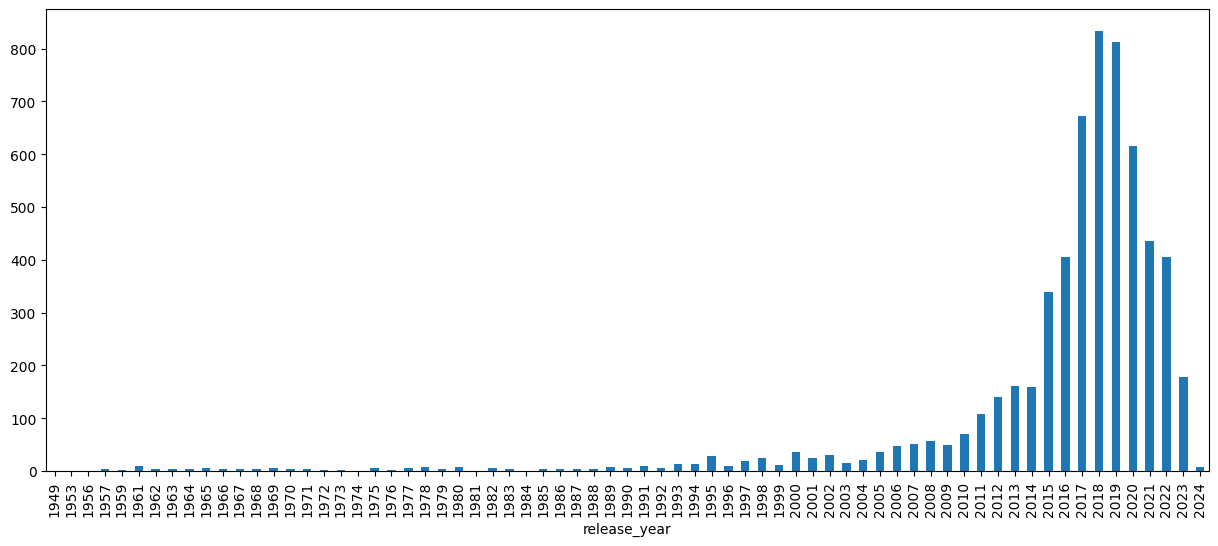

In [14]:
df_analysis['release_year'].value_counts().sort_index().plot(kind='bar', figsize=(15, 6))

Clearly, I'm jamming more to tunes from my era, with 2018 topping the charts for me. But my musical journey spans all the way back to 1949. In case you're curious, the golden oldie from '49 that caught my ear is Erik Satie's Gymnopédie.

### Artists

Now that we know the era from which I saved the most songs, let's identify the artists for whom I have saved the most songs as well as the total number of artists I have saved songs from.

In [20]:
#Top 20 artists with the most songs

df_analysis_ = df_analysis[['artist', 'name']]\
    .groupby('artist')\
    .count()\
    .sort_values('name', ascending=False)\
    .reset_index()\
    .rename(columns={'name': 'count'})
df_analysis_.head(20)

,artist,count
0,Various Artists,86
1,Drake,60
2,Rihanna,57
3,One Direction,53
4,Twenty One Pilots,45
5,Damso,44
6,Billie Eilish,37
7,Nekfeu,35
8,"Tyler, The Creator",32
9,Big Sean,31


In [14]:
len(df_analysis.artist.unique())

2149

In [21]:
len(df_analysis)

5982

2149 artists for 5982 songs. In terms of diversity, not bad at all. If we disregard 'Various Artists', I have the most songs from Drake, Rihanna, One Direction, Twenty One Pilots and Damso. Pretty representative. Do not judge me for One Direction, I was a big fan.

### Song titles wordcloud

Let's now make a wordcloud of the most frequent words appearing in the titles of my saved songs. Maybe this could give us some insights into my favourite themes.

In [15]:
#import english stopwords
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /Users/admin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
# Removing some famous english, french and music stopwords.

stop_words_en = set(stopwords.words('english'))
stop_words_fr = set(stopwords.words('french'))
music_stopwords = {'music', 'feat', 'featuring', 'ft', 'remix', 'version', 'edit', 'mix', 'live', 'acoustic', 'cover', 'session', 'original', 'explicit', 'radio', 'band', 'soundtrack', 'theme', 'movie', 'album', 'ep', 'single', 'track', 'song', 'record', 'records', 'label', 'studio', 'release', 'records', 'recordings', 'recorded', 'recording', 'productions', 'production', 'produced', 'producer', 'producers', 'publishing', 'publishers', 'publish', 'published', 'publishes', 'distributor', 'distributors', 'distribute', 'distributed', 'distributing', 'travis', 'scott', 'drake', 'x', 'da', 'nicki', 'u', 'intro', 'pt', 'interlude', 'minaj', 'b', 'future', 'brown', 'bonus', 'thug', 'ap', 'remastered'}
stop_words = stop_words_en.union(stop_words_fr)
stop_words = stop_words.union(music_stopwords)

In [17]:
def get_words(df):
    title_words = []
    for i in range(len(df['name'])):
        song_title_words = df.loc[i, 'name'].split()
        for j in range(len(song_title_words)):
            title_words.append(song_title_words[j].lower())
    title_words = ' '.join(title_words)
    return title_words


def make_wordcloud(text, name):
    text = text.lower()
    # lower max_font_size, change the maximum number of word and lighten the background:
    wordcloud = WordCloud(min_font_size=10, max_font_size=40, max_words=200, background_color="white",
                          collocations=False, margin=5, stopwords=(stop_words),
                          colormap="Dark2").generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.savefig(name)
    plt.show()

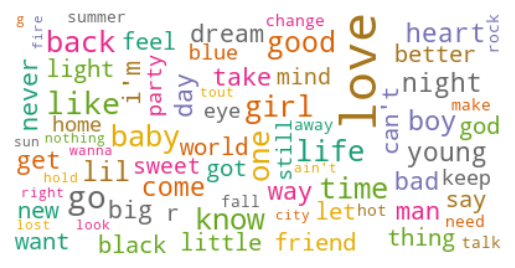

In [18]:
words_df = get_words(df_analysis)
make_wordcloud(words_df, "word_cloud.png")

This is very...positive! My emo teen phase seems to be very far, phew.

## Song popularity analysis

### Unpopular songs

We noticed earlier that some famous songs were given a popularity of 0. Let's take a closer look at the popularity series.

Text(0, 0.5, 'Frequency')

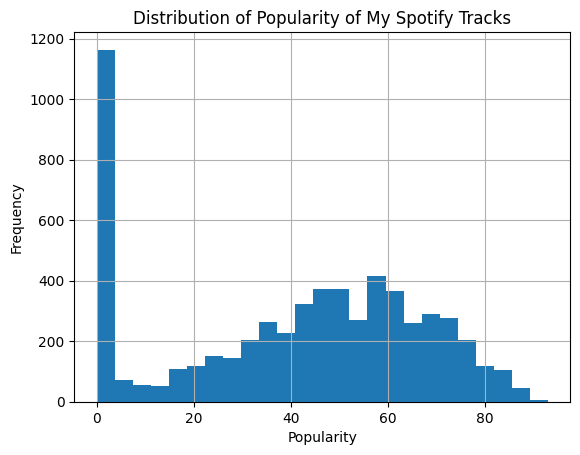

In [15]:
df_analysis.popularity.hist(bins = 25)
plt.title('Distribution of Popularity of My Spotify Tracks')
plt.xlabel('Popularity')
plt.ylabel('Frequency')

In [36]:
df_test.describe()['popularity']

count    5982.000000
mean       40.828485
std        26.072289
min         0.000000
25%        20.000000
50%        46.000000
75%        61.000000
max        93.000000
Name: popularity, dtype: float64

The distribution seems somewhat normal except for a large peak at 0. The median is 46, which means that despite this huge peak, I still have a decent amount of popular and niche songs. Almost a quarter of my total songs have a popularity of 0? Either a lot of songs are very niche, or there are possibly some cracks in Spotify's data gathering.

In [22]:
popularity_0_df = df.loc[df['popularity']==0]
popularity_0_df.tail(20)

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,time_signature,key,mode,uri,release_year
5945,Fight Night,No Label II,Migos,2014-06-03,216247,0,0.1820,0.874,0.706,0.000000,0.3340,-5.132,0.2070,89.961,0.895,4,1,1,spotify:track:2n5gVJ9fzeX2SSWlLQuyS9,2014
5946,Flex,Hors série vol.1,4Keus Gang,2017-09-29,221538,0,0.5350,0.613,0.701,0.000000,0.0803,-7.340,0.1830,130.049,0.659,4,3,0,spotify:track:1YzCGVofboidt2B9qWjSK6,2017
5948,Épilogue,Épilogue,Luidji,2017-07-26,192549,0,0.4320,0.521,0.536,0.000000,0.1170,-6.915,0.0949,136.166,0.538,3,6,1,spotify:track:6WQoyaYFbuIxaNVrN3IECL,2017
5950,Different Now,Different Now,Fetty Wap,2016-08-19,202815,0,0.4860,0.739,0.618,0.000000,0.1810,-8.819,0.2870,141.976,0.761,4,6,0,spotify:track:0vaLkbnSGRylEP7eFPWh0A,2016
5953,Fume à fond,Fume à fond,Lorenzo,2017-06-16,182533,0,0.3900,0.827,0.666,0.000000,0.0992,-6.518,0.3860,75.022,0.781,4,3,0,spotify:track:2fgk04HR0nlgNysfX7fKF0,2017
5955,At The Club,At The Club,Jacquees,2017-09-29,173053,0,0.1080,0.793,0.655,0.000000,0.0739,-7.323,0.0866,92.030,0.370,4,7,0,spotify:track:1lELy2PyAw0NnJ03s6EE0p,2017
5960,Nirvana,In The Lonely Hour (Drowning Shadows Edition),Sam Smith,2015-11-06,202268,0,0.5320,0.328,0.580,0.002020,0.1010,-8.165,0.0639,146.788,0.340,4,0,1,spotify:track:21CUsZRGLSfKGjkGrPwii8,2015
5961,Fugazi,Destins liés,S-Crew,2016-06-17,200693,0,0.2890,0.643,0.547,0.000112,0.0901,-7.395,0.2980,145.922,0.198,4,9,0,spotify:track:2q3H7zd2xGrSEN6HrPyEaR,2016
5965,Oui Je,Oui Je - Single,Oxmo Puccino,2016-10-27,174782,0,0.1510,0.715,0.537,0.000000,0.1290,-7.745,0.3040,92.391,0.658,4,2,1,spotify:track:5mwlefRCFTMgRSHwobyJR6,2016
5966,Gas Pedal,Remember Me,Sage The Gemini,2014-01-01,208160,0,0.0287,0.846,0.530,0.000000,0.1230,-8.062,0.0578,97.524,0.461,4,1,1,spotify:track:1L0rvFTlpoR8rHxdR4lTSN,2014


Some songs seem to be a mistake. Spotify calculates the popularity of a song by algorithm, based, in the most part, on the total number of plays the track has had and how recent those plays are. It is definetely strange that Passionfruit by Drake and PRBLMS by 6LACK have a popularity score of 0. However, it can be seen that most of the songs are indeed quite unpopular. It can therefore be assumed that I do have very diverse and that the proportion of 'errors' for poularity is very small.

### Popular songs

In [23]:
df_analysis.loc[df_analysis['popularity']>80]

,name,album,artist,length,release_year,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,time_signature,key,mode,uri
40,Praise Jah In The Moonlight,Praise Jah In The Moonlight,YG Marley,263040,2023,93,0.128000,0.660,0.727,0.000013,0.5240,-4.028,0.0441,125.023,0.418,4,6,0,spotify:track:3h5TiWTqGxjSjFrbruPFH9
79,Smells Like Teen Spirit,Nevermind (Remastered),Nirvana,301920,1991,83,0.000025,0.502,0.912,0.000173,0.1060,-4.556,0.0564,116.761,0.720,4,1,1,spotify:track:4CeeEOM32jQcH3eN9Q2dGj
115,Ain't No Sunshine,Just As I Am,Bill Withers,125093,1971,86,0.457000,0.527,0.415,0.000017,0.1170,-11.451,0.1220,78.169,0.515,4,4,0,spotify:track:1k1Bqnv2R0uJXQN4u6LKYt
120,Open Arms (feat. Travis Scott),SOS,SZA,239613,2022,81,0.763000,0.665,0.590,0.013200,0.1470,-7.608,0.1610,77.559,0.216,4,9,1,spotify:track:0xaFw2zDYf1rIJWl2dXiSF
206,Lose Control,Lose Control,Teddy Swims,210688,2023,89,0.199000,0.561,0.604,0.000019,0.1040,-4.409,0.0337,159.920,0.242,3,9,1,spotify:track:6usohdchdzW9oML7VC4Uhk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,Ivy,Blonde,Frank Ocean,249191,2016,83,0.785000,0.575,0.386,0.000289,0.2290,-9.584,0.0370,116.408,0.466,4,9,0,spotify:track:2ZWlPOoWh0626oTaHrnl2a
5689,Best Part (feat. H.E.R.),Freudian,Daniel Caesar,209831,2017,84,0.808000,0.524,0.364,0.000000,0.1000,-10.209,0.0367,75.240,0.436,4,7,1,spotify:track:1RMJOxR6GRPsBHL8qeC2ux
5726,ocean eyes,dont smile at me,Billie Eilish,200379,2017,83,0.816000,0.511,0.363,0.031700,0.0840,-7.650,0.0410,144.892,0.169,4,4,0,spotify:track:7hDVYcQq6MxkdJGweuCtl9
5847,Get You (feat. Kali Uchis),Freudian,Daniel Caesar,278179,2017,82,0.422000,0.658,0.294,0.000052,0.0749,-8.533,0.0321,74.038,0.358,4,4,0,spotify:track:7zFXmv6vqI4qOt4yGf3jYZ


On the other hand, if we define the popular songs as having more than a score of 80, we can see that they definetly are all popular. 'Praise Jah In The Moonlight', classified as popular, is very recent and has about 3 times less total listeners (as seen on Spotify itself) than 'Passionfruit', less recent and classified as unpopular. The popularity score is apparently very reliant on the number of 'recent plays', and therefore may not comport errors at all. Its significance, however, can be discussed.

## Audio features analysis

Now, the main part of our analysis. We'll use radar charts to plot audio features and try to make sense out of them. We will first plot the average audio features from all my songs, then compare it with the audio features from the most popular songs. The goal is basically to see if the features I prefer in average, are very popular or not.

Then, just for fun, some individual songs' audio features will be plotted and compare with the previous radar charts.

### Radar chart function and scaling 

In [42]:
def plot_radar_chart(data_dict, title):
    labels = list(data_dict.keys())
    values = list(data_dict.values())
    num_vars = len(labels)

    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    values += values[:1]
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    ax.fill(angles, values, color='purple', alpha=0.25)
    ax.plot(angles, values, color='purple', linewidth=2)

    radial_ticks = np.linspace(0.0, 1.0, 6)
    radial_labels = [str(round(tick, 2)) for tick in radial_ticks]
    ax.set_yticks(radial_ticks)
    ax.set_yticklabels(radial_labels)
    
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    ax.set_title(title)

    plt.show()

The values are scaled to be between 0 and 1, for homogeneity.

In [43]:
from sklearn.preprocessing import MinMaxScaler

def convert_scale(df):
    scaler = MinMaxScaler()  
    for col in df.columns[6:18]: 
        df[[col]] = scaler.fit_transform(df[[col]])
    return df



In [44]:
df_test = df_analysis.copy()

In [45]:
convert_scale(df_test)

,name,album,artist,length,release_year,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,time_signature,key,mode,uri
0,Freedom,Pray For Atlanta,1K Phew,225990,2024,32,0.756539,0.570702,0.487928,0.000000,0.173156,0.802245,0.032344,0.560089,0.402848,0.8,0.090909,1.0,spotify:track:27p6SXxrGUCJJ5LSoRODuI
1,Everything I Need,BOATS,Steven Malcolm,144230,2024,21,0.081590,0.799593,0.528169,0.000021,0.196721,0.724984,0.065748,0.448534,0.424212,0.8,0.909091,0.0,spotify:track:4DIxNuXWVW5GDeOlsovGXs
2,40,BOATS,Steven Malcolm,164307,2024,24,0.804829,0.723296,0.459759,0.000382,0.652664,0.648783,0.223754,0.561197,0.527976,0.8,0.181818,0.0,spotify:track:1G9PvaP9BzkC447m6sDgHF
3,All On Me,BOATS,Steven Malcolm,179200,2024,24,0.147887,0.759919,0.521127,0.000053,0.295082,0.721125,0.190880,0.646913,0.620549,0.8,0.727273,1.0,spotify:track:6KJdP1beNT5xjjGrLNaIWW
4,Story Of A Rider,BOATS,Steven Malcolm,229090,2024,23,0.272636,0.659207,0.399396,0.000004,0.299180,0.705335,0.257688,0.664219,0.530010,0.8,0.909091,0.0,spotify:track:621hqIHMiz8D1rwAV9fVKW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,PRBLMS,FREE 6LACK,6LACK,246773,2016,0,0.032897,0.496439,0.592555,0.000002,0.184426,0.849212,0.146341,0.439920,0.129196,0.8,0.818182,1.0,spotify:track:3KH1kmD5mYQxyeHLoebQTF
5978,With You,Exclusive - The Forever Edition,Chris Brown,252120,2007,0,0.134809,0.673449,0.697183,0.000000,0.148566,0.858923,0.074019,0.371010,0.666328,0.8,0.272727,1.0,spotify:track:1CdkNxTlkUWR4ZnXcKES3b
5979,Lollipop,Tha Carter III,Lil Wayne,299333,2008,68,0.056338,0.843337,0.430584,0.004245,0.140369,0.728490,0.088123,0.638739,0.457782,0.8,0.000000,1.0,spotify:track:5jnxxpX2834SB6LJ0S73Uz
5980,Signs,Signs,Drake,234373,2017,0,0.086922,0.814852,0.731388,0.004173,0.114754,0.849111,0.064263,0.463157,0.221770,0.8,0.000000,1.0,spotify:track:5EnYT6F7wEcdege6mDHEfO


### My average audio features

In [50]:
my_mean_stats = df_test.describe().iloc[1, :]
my_mean_stats_dict = my_mean_stats[3:].to_dict()

In [51]:
my_mean_stats_dict

{'acousticness': 0.30726731211407526,
 'danceability': 0.684768870871686,
 'energy': 0.5781607448098823,
 'instrumentalness': 0.03933684606577526,
 'liveness': 0.17410393749554676,
 'loudness': 0.7702544763815979,
 'speechiness': 0.14775324559752076,
 'tempo': 0.5155804969836235,
 'valence': 0.4944211066566944,
 'time_signature': 0.7913741223671013,
 'key': 0.4769307923771314,
 'mode': 0.5473085924439987}

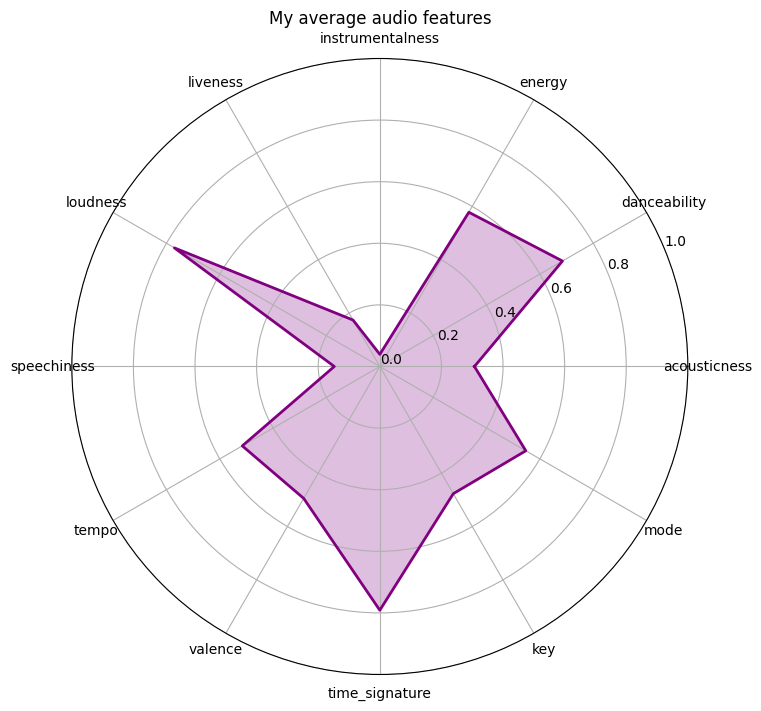

In [52]:
plot_radar_chart(my_mean_stats_dict, 'My average audio features')

### Popular songs' audio features

Let's now get the average audio features from my popular songs to see if it resembles my average audio features. PS: The popular songs represent 3% of my total songs.

In [53]:
popular_features = {value: df_test.loc[df_test['popularity']>80][value].mean() for value in df_test.columns[6:18]}

In [54]:
popular_features

{'acousticness': 0.2982370656229041,
 'danceability': 0.6370591726008817,
 'energy': 0.5809010311871227,
 'instrumentalness': 0.03303561761305242,
 'liveness': 0.176208162568306,
 'loudness': 0.7901450897549083,
 'speechiness': 0.08537634764934605,
 'tempo': 0.49228938674022826,
 'valence': 0.4681634664292981,
 'time_signature': 0.7854166666666668,
 'key': 0.4815340909090909,
 'mode': 0.6458333333333334}

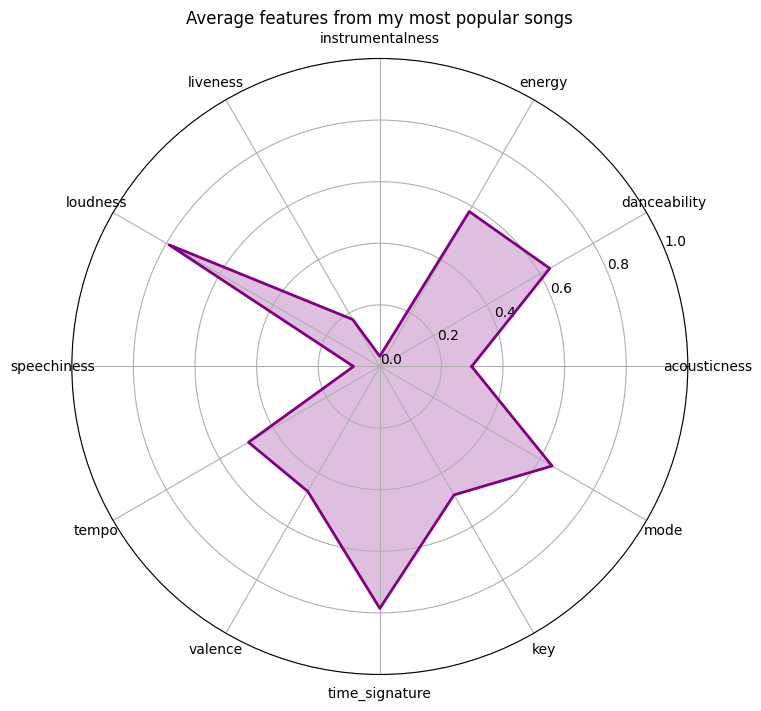

In [57]:
plot_radar_chart(popular_features, 'Average features from my most popular songs')

Wow...I'm sad to admit this...but these are very similar. In my defence, the popular songs I gathered as they are already part of my songs, which makes the analysis biaised. A better analysis would be to compare Spotify's most popoular songs (of all time, or a specific year), and a playlist of my top songs (of all time, or a specific year). If I ensure the playlists are of comparable size, then this would provide a fairer analysis. (To be done in a near future )

### Interpreting the radar charts results and seeing if they make sense

In [63]:
#find a song by name in the df
def find_song(name, artist=None):
    if artist:
        result = df_test.loc[(df_test['name'] == name) & (df_test['artist'] == artist)]
    else:
        result = df_test.loc[df_test['name'] == name]

    if len(result) > 1:
        print("Warning: Multiple songs found.")
    elif result.empty:
        print("No song found.")
    return result

In [173]:
find_song('Broken')

,name,album,artist,length,release_year,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,time_signature,key,mode,uri
100,Broken,NO THANK YOU,Little Simz,449623,2022,45,0.782696,0.349949,0.529175,0.000000,0.112705,0.761685,0.047402,0.341617,0.189217,0.8,0.000000,1.0,spotify:track:2USBjlAKDOSzgUq7OiDFqO
621,Broken,OPTNT,Smeels,136046,2017,53,0.437626,0.796541,0.414487,0.000003,0.103484,0.677135,0.309650,0.384339,0.447609,0.8,0.727273,1.0,spotify:track:02OpQWSd5wOAO0dYTIpoKl


In [64]:
def get_features_chart(n,a= None):
    song_features = find_song(n,a)

    features_dict = {key: value.iloc[0] for key, value in song_features.iloc[:, 6:18].to_dict(orient='series').items()}
    
    title = f'Features for {n} by {song_features.iloc[0]["artist"]}'
    plot_radar_chart(features_dict, title)

#### Instrumentalness and speechiness?

In [60]:
#popular songs dont have a lot instrumentalness, what are the songs with high instrumentalness?

df_test.loc[df_test['instrumentalness']>0.8].tail(20)

,name,album,artist,length,release_year,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,time_signature,key,mode,uri
4947,Good Life 2005,Coupé décalé Hits,Kaysha,378323,2012,9,0.005080,0.798576,0.846076,0.878726,0.126025,0.759919,0.065429,0.560693,0.652085,0.8,0.636364,1.0,spotify:track:1lsKjyCnTGpTqrrJFEvxka
4987,"A Nova Vida (From ""La Saga Crepúsculo: Amanece...",Música de la Crepúsculo Saga,The City of Prague Philharmonic Orchestra,177400,2012,0,0.604628,0.443540,0.310865,0.931141,0.107582,0.596595,0.034677,0.531476,0.365209,0.8,0.000000,1.0,spotify:track:5YQTZdBMi8opG51o4tOnDa
5195,Divenire,Divenire,Ludovico Einaudi,404253,2007,0,0.919517,0.146490,0.211268,0.907503,0.071107,0.578257,0.036479,0.382924,0.085453,0.6,0.636364,1.0,spotify:track:4O0Yww5OIWyfBvWn6xN3CM
5265,Love Death Birth,The Twilight Saga: Breaking Dawn - Part 1 (Ori...,Various Artists,363573,2011,43,0.781690,0.126144,0.165996,0.872559,0.075307,0.562341,0.039130,0.755578,0.043438,0.8,0.636364,1.0,spotify:track:6LhDHKzQHlskQy7j251ib8
5284,"Für Elise, WoO 59",Beethoven Greatest Hits,Ludwig van Beethoven,188466,1991,62,1.000000,0.308240,0.108652,0.901336,0.082480,0.275369,0.050159,0.547532,0.183113,0.6,0.818182,0.0,spotify:track:6MQAB3vorg90FA3tQpbYXK
5285,"Romeo And Juliet, Op.64 / Act 1: Dance of the ...",Prokofiev: Romeo & Juliet (2 CDs),Sergei Prokofiev,306500,1973,0,0.812877,0.204476,0.063179,0.806783,0.433402,0.439576,0.041994,0.337415,0.114954,0.6,0.000000,1.0,spotify:track:27NuoejNilotHbMBZgbkoU
5286,"The Four Seasons, Violin Concerto No. 2 in G M...",Sinkovsky Plays and Sings Vivaldi,Antonio Vivaldi,153573,2014,45,0.842052,0.338759,0.467807,0.819116,0.298156,0.501904,0.048993,0.733108,0.652085,0.6,0.636364,1.0,spotify:track:3qwVqJyXKNiPZLz9VBMd6r
5287,"Beethoven: Symphony No. 9 in D Minor, Op. 125 ...",Beethoven: Symphonies Nos. 1 - 9,Ludwig van Beethoven,822306,1991,47,0.969819,0.375381,0.190141,0.841727,0.078791,0.409257,0.045175,0.489406,0.285860,0.8,0.181818,0.0,spotify:track:6lnttZF0hDaVyVZBEgpJ3I
5288,Seven Days Walking / Day 3: Full Moon,Seven Days Walking (Day 3),Ludovico Einaudi,218680,2019,39,0.998994,0.171923,0.015694,1.000000,0.097643,0.076529,0.045387,0.436439,0.088301,0.8,0.000000,0.0,spotify:track:3SdFSdCerdFIQ0B1jyS2j4
5289,River Flows In You - Original,First Love (Yiruma Piano Collection),Yiruma,185527,2001,0,0.993964,0.315361,0.219316,0.978417,0.087090,0.427595,0.053765,0.625794,0.098576,0.8,0.818182,1.0,spotify:track:47ZWr1Nb0PUgmKgyg5JkgO


<Axes: >

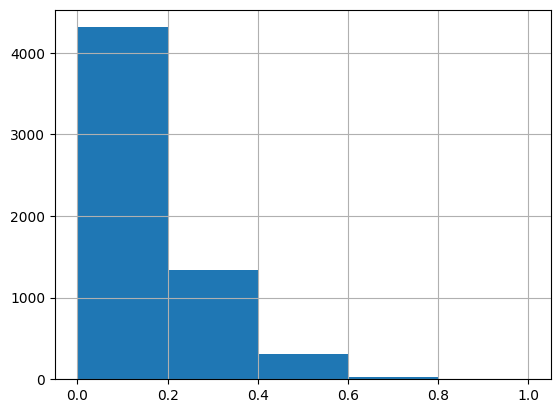

In [183]:
df_test['speechiness'].hist(bins=5) 

In [198]:
df_test.loc[df_test['speechiness']>0.6]

#mostly rap songs, especially french rap

,name,album,artist,length,release_year,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,time_signature,key,mode,uri
182,and?,and?,Brandon Nembhard,138666,2023,0,0.397384,0.602238,0.539235,0.000000,0.454918,0.663135,0.623542,0.536830,0.562564,0.6,0.909091,0.0,spotify:track:3wVO0oOZmCNcNMN8Ns2qlJ
578,Spécial - Outro,Sale môme,Niro,83733,2020,19,0.847082,0.829095,0.590543,0.000330,0.089549,0.805524,0.658537,0.608289,0.726348,0.8,1.000000,0.0,spotify:track:7L5re8owQS1PMz4HsUMYrx
1026,Chop (Nouvelle École),Chop (Nouvelle École),Fresh,195560,2022,0,0.441650,0.757884,0.805835,0.000001,0.531762,0.802245,0.767762,0.616895,0.494405,0.8,0.272727,0.0,spotify:track:6KHsTu4Ht4XYiWcZOOdwbW
1089,2MS,2MS,Nemzzz,108169,2022,72,0.018612,0.900305,0.334004,0.000000,0.121926,0.749905,0.899258,0.611882,0.430315,0.8,0.090909,1.0,spotify:track:0rwOtnvfoBHa443aTwjSlu
1547,Système,Tristesse Business : Saison 1,Luidji,229417,2019,61,0.411469,0.806714,0.415493,0.000000,0.053689,0.626611,0.738070,0.620794,0.697864,0.8,1.000000,0.0,spotify:track:1XNFIJMhSR7ozrxxjc9mcd
1581,Alone With You,Alone With You,Arz,195200,2021,63,0.289738,0.781282,0.376258,0.000002,0.113730,0.652289,0.766702,0.325691,0.404883,0.8,0.636364,1.0,spotify:track:0W7brFokN6QtGRNp32RCQP
1865,Procurado na Dz7 (feat. Mc Rd),Procurado na Dz7 (feat. Mc Rd),Dj Tk,166060,2020,0,0.110664,0.953204,0.500000,0.000000,0.087602,0.830470,0.636267,0.573845,0.869786,0.8,0.818182,1.0,spotify:track:03H452TXIPmK7x2hdZwEMs
1878,RAPLEADER 6,RAPLEADER 6,Kodes,98037,2019,0,0.134809,0.980671,0.332998,0.000000,0.053791,0.616547,0.615058,0.517328,0.658189,0.8,0.727273,1.0,spotify:track:5ndCRyWcfDqN3ZP6WEfP3e
1977,MOB TIES,MOB TIES,KOJO,156000,2021,0,0.103622,0.663276,0.336016,0.000000,0.079816,0.689343,0.722163,0.409863,0.388606,0.8,0.727273,1.0,spotify:track:6wls56PpTFKHAdFMzDd8sM
2258,Petty Lover,Pretty Dreamer / Petty Lover,Jaz Karis,160654,2018,0,0.807847,0.776195,0.364185,0.000005,0.163934,0.712246,0.606575,0.517009,0.597152,1.0,0.545455,1.0,spotify:track:6d4E3KLrX4xiwx1DiIJefO


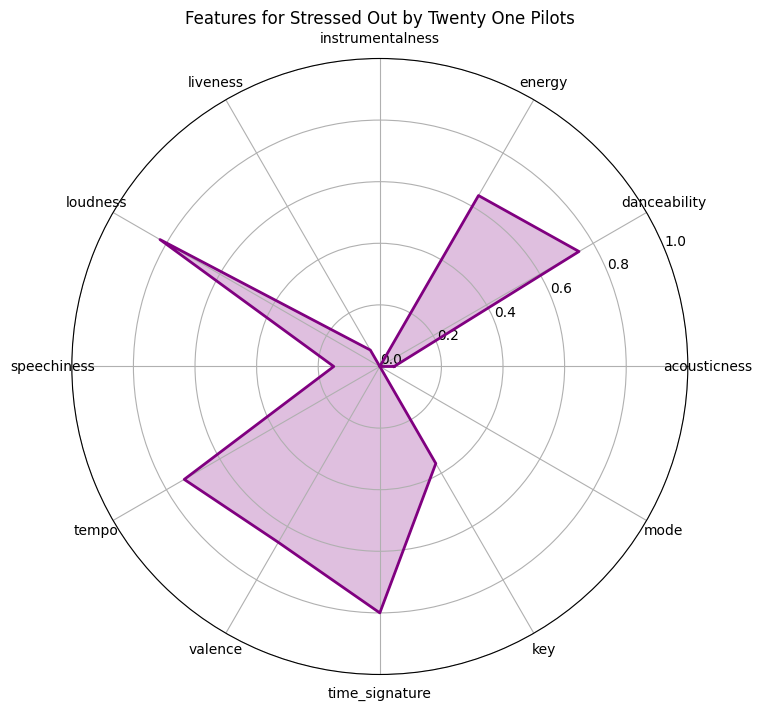

In [79]:
get_features_chart('Stressed Out', 'Twenty One Pilots')

<Axes: xlabel='name'>

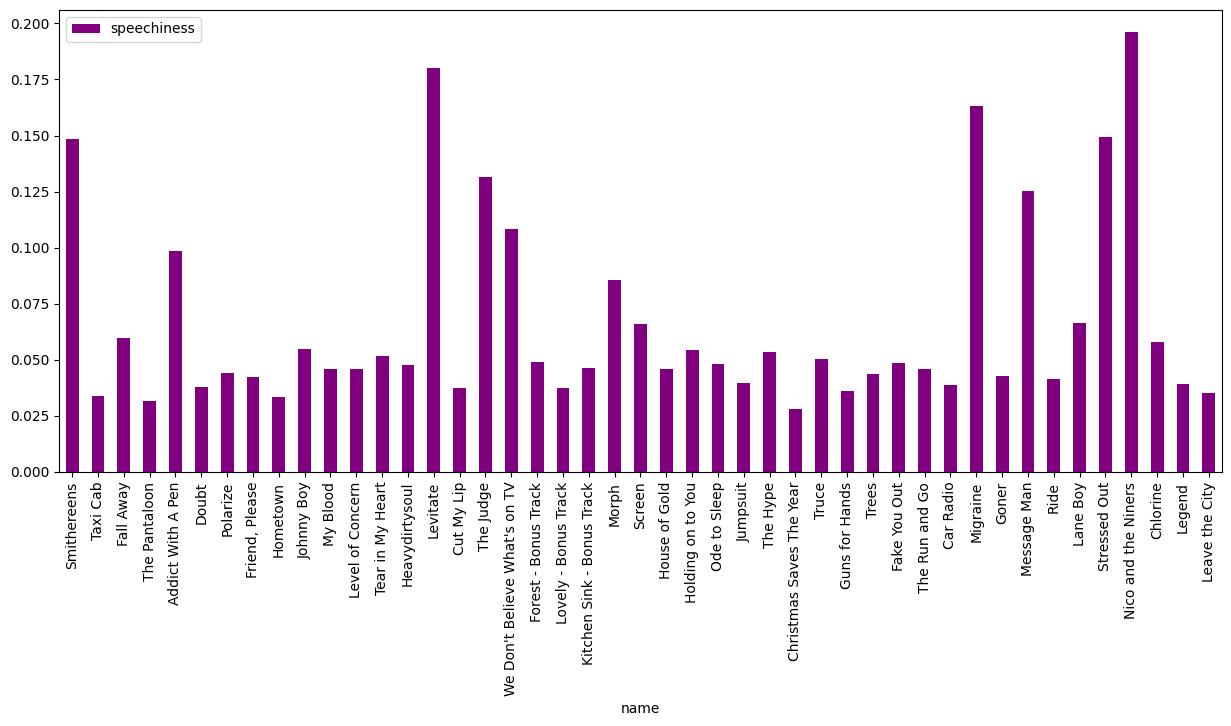

In [84]:
#Getting a bar plot of speechiness of Twenty One Pilots songs with name of the song
twenty_one_pilots = df_test.loc[df_test['artist'] == 'Twenty One Pilots']
twenty_one_pilots[['name', 'speechiness']].set_index('name').plot(kind='bar', figsize=(15, 6), color='purple')


twenty one pilots is one of the most speechy artists I know, how are they not exceeding 0.2?

#### Having fun with songs

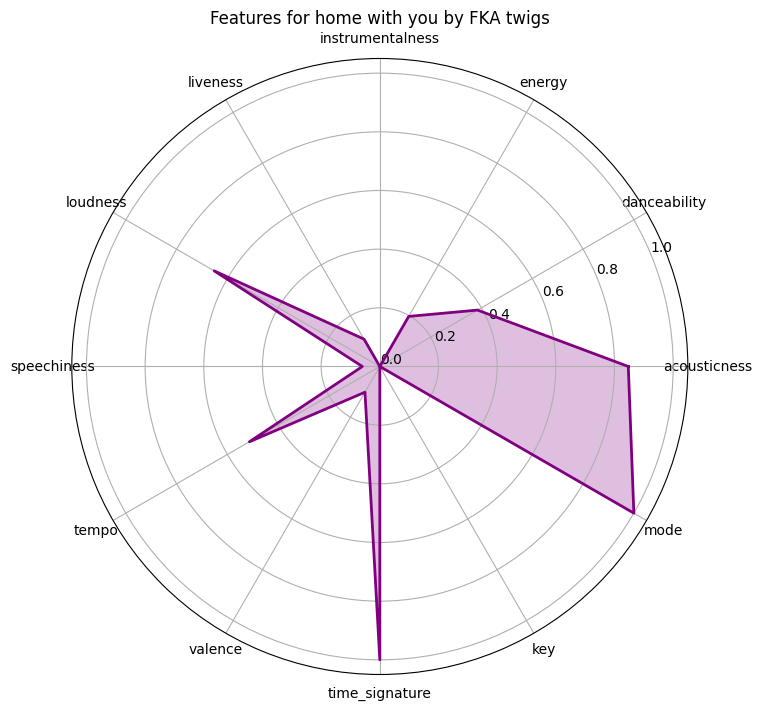

In [83]:
get_features_chart('home with you')